In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import copy
import scipy.integrate as spi
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

plt.rcParams["font.sans-serif"]=["SimHei"] 
plt.rcParams["axes.unicode_minus"]=False 

In [2]:
def deal(r):
    if(r<103):
        return r-2
    else:
        return r-4


data_taxi_fhv=pd.read_csv(r'C:\jupyter notebook\PAPER\data for taxi\fhv_tripdata_2020-03.csv')[['pickup_datetime','PULocationID','DOLocationID']]
data_taxi_fhvhv=pd.read_csv(r'C:\jupyter notebook\PAPER\data for taxi\fhvhv_tripdata_2020-03.csv')[['pickup_datetime','PULocationID','DOLocationID']]
data_taxi_green=pd.read_csv(r'C:\jupyter notebook\PAPER\data for taxi\green_tripdata_2020-03.csv')[['lpep_pickup_datetime','PULocationID','DOLocationID']]
data_taxi_green.columns=['pickup_datetime','PULocationID','DOLocationID']
data_taxi_yellow=pd.read_csv(r'C:\jupyter notebook\PAPER\data for taxi\yellow_tripdata_2020-03.csv')[['tpep_pickup_datetime','PULocationID','DOLocationID']]
data_taxi_yellow.columns=['pickup_datetime','PULocationID','DOLocationID']

data_taxi=pd.concat((data_taxi_fhv,data_taxi_fhvhv,data_taxi_green,data_taxi_yellow),axis=0)
data_taxi['date']=data_taxi['pickup_datetime'].apply(lambda r: int(''.join(r.split(' ')[0].split('-'))))
data_taxi['hours']=data_taxi['pickup_datetime'].apply(lambda r: int(r.split(' ')[1].split(':')[0]))


data_taxi=data_taxi[(data_taxi['date']>20200300)&(data_taxi['date']<20200400)]


data_taxi=data_taxi[['PULocationID','DOLocationID']]
data_taxi=data_taxi.dropna().astype(int)
data_taxi['num']=1

data_taxi=data_taxi[(data_taxi['PULocationID']!=264) & (data_taxi['PULocationID']!=265) & (data_taxi['PULocationID']!=1) &
          (data_taxi['DOLocationID']!=264) & (data_taxi['DOLocationID']!=265) & (data_taxi['DOLocationID']!=1)]

data_taxi['PULocationID']=data_taxi['PULocationID'].apply(lambda r:deal(r))
data_taxi['DOLocationID']=data_taxi['DOLocationID'].apply(lambda r:deal(r))
data_taxi=data_taxi.reset_index(drop=True)

data_OD=data_taxi.groupby(['PULocationID','DOLocationID']).sum().unstack().fillna(0).astype(int).stack().reset_index()
data_OD['num']=data_OD['num']+1
data_OD

,PULocationID,DOLocationID,num
0,0,0,1
1,0,1,1
2,0,2,1
3,0,3,1
4,0,4,1
...,...,...,...
67595,259,255,79
67596,259,256,185
67597,259,257,307
67598,259,258,4705


In [3]:
data_OD1=data_taxi.groupby(['PULocationID','DOLocationID']).sum().unstack().fillna(0).astype(int)
data_OD1=data_OD1.applymap(lambda x:x+1)  
data_OD1=np.array(data_OD1).tolist()  

M=260

P=copy.deepcopy(data_OD1)
for i in range(0,len(data_OD1)):
    for j in range(0,len(data_OD1)):
        P[i][j]=data_OD1[i][j]/sum(data_OD1[i])
P

[[0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.007042253521126761,
  0.0035211267605633804,
  0.007042253521126761,
  0.0035211267605633804,
  0.017605633802816902,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.007042253521126761,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.0035211267605633804,
  0.

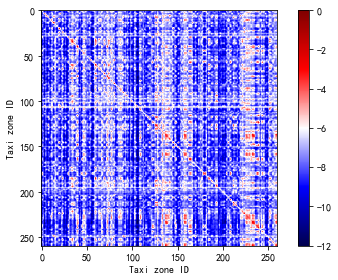

In [4]:
plt.imshow(np.log(np.array(P)),cmap='seismic',interpolation='bicubic',vmin=-12,vmax=0)

plt.colorbar()

plt.xlabel('Taxi zone ID')
plt.ylabel('Taxi zone ID')
plt.tight_layout()

plt.savefig('Heat map of March,2020.svg',dpi=1000,format='svg')

# Heat map from March 1 to March 13,2020

In [5]:
def deal(r):
    if(r<103):
        return r-2
    else:
        return r-4


data_taxi_fhv=pd.read_csv(r'C:\jupyter notebook\PAPER\data for taxi\fhv_tripdata_2020-03.csv')[['pickup_datetime','PULocationID','DOLocationID']]
data_taxi_fhvhv=pd.read_csv(r'C:\jupyter notebook\PAPER\data for taxi\fhvhv_tripdata_2020-03.csv')[['pickup_datetime','PULocationID','DOLocationID']]
data_taxi_green=pd.read_csv(r'C:\jupyter notebook\PAPER\data for taxi\green_tripdata_2020-03.csv')[['lpep_pickup_datetime','PULocationID','DOLocationID']]
data_taxi_green.columns=['pickup_datetime','PULocationID','DOLocationID']
data_taxi_yellow=pd.read_csv(r'C:\jupyter notebook\PAPER\data for taxi\yellow_tripdata_2020-03.csv')[['tpep_pickup_datetime','PULocationID','DOLocationID']]
data_taxi_yellow.columns=['pickup_datetime','PULocationID','DOLocationID']

data_taxi=pd.concat((data_taxi_fhv,data_taxi_fhvhv,data_taxi_green,data_taxi_yellow),axis=0)
data_taxi['date']=data_taxi['pickup_datetime'].apply(lambda r: int(''.join(r.split(' ')[0].split('-'))))
data_taxi['hours']=data_taxi['pickup_datetime'].apply(lambda r: int(r.split(' ')[1].split(':')[0]))



data_taxi=data_taxi[(data_taxi['date']>20200300)&(data_taxi['date']<20200314)]


data_taxi=data_taxi[['PULocationID','DOLocationID']]
data_taxi=data_taxi.dropna().astype(int)
data_taxi['num']=1

data_taxi=data_taxi[(data_taxi['PULocationID']!=264) & (data_taxi['PULocationID']!=265) & (data_taxi['PULocationID']!=1) &
          (data_taxi['DOLocationID']!=264) & (data_taxi['DOLocationID']!=265) & (data_taxi['DOLocationID']!=1)]

data_taxi['PULocationID']=data_taxi['PULocationID'].apply(lambda r:deal(r))
data_taxi['DOLocationID']=data_taxi['DOLocationID'].apply(lambda r:deal(r))
data_taxi=data_taxi.reset_index(drop=True)

dfdf=[]
for i in range(260):
    for j in range(260):
        dfdf.append([j,j,0])
dfdf=pd.DataFrame(dfdf,columns=['PULocationID','DOLocationID','num'])
data_taxi=pd.concat([data_taxi,dfdf])


data_OD1=data_taxi.groupby(['PULocationID','DOLocationID']).sum().unstack().fillna(0).astype(int)
data_OD1=data_OD1.applymap(lambda x:x+1)   
data_OD1=np.array(data_OD1).tolist()  

M=260

P=copy.deepcopy(data_OD1)
for i in range(0,len(data_OD1)):
    for j in range(0,len(data_OD1)):
        P[i][j]=data_OD1[i][j]/sum(data_OD1[i])

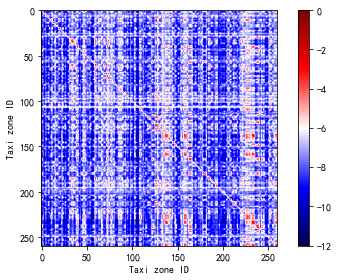

In [6]:
plt.imshow(np.log(np.array(P)),cmap='seismic',interpolation='bicubic',vmin=-12,vmax=0)

plt.colorbar()

plt.xlabel('Taxi zone ID')
plt.ylabel('Taxi zone ID')
plt.tight_layout()

plt.savefig('Heat map from March 1 to March 13,2020.svg',dpi=1000,format='svg')

# Heat map from March 14 to March 31,2020

In [7]:
def deal(r):
    if(r<103):
        return r-2
    else:
        return r-4


data_taxi_fhv=pd.read_csv(r'C:\jupyter notebook\PAPER\data for taxi\fhv_tripdata_2020-03.csv')[['pickup_datetime','PULocationID','DOLocationID']]
data_taxi_fhvhv=pd.read_csv(r'C:\jupyter notebook\PAPER\data for taxi\fhvhv_tripdata_2020-03.csv')[['pickup_datetime','PULocationID','DOLocationID']]
data_taxi_green=pd.read_csv(r'C:\jupyter notebook\PAPER\data for taxi\green_tripdata_2020-03.csv')[['lpep_pickup_datetime','PULocationID','DOLocationID']]
data_taxi_green.columns=['pickup_datetime','PULocationID','DOLocationID']
data_taxi_yellow=pd.read_csv(r'C:\jupyter notebook\PAPER\data for taxi\yellow_tripdata_2020-03.csv')[['tpep_pickup_datetime','PULocationID','DOLocationID']]
data_taxi_yellow.columns=['pickup_datetime','PULocationID','DOLocationID']

data_taxi=pd.concat((data_taxi_fhv,data_taxi_fhvhv,data_taxi_green,data_taxi_yellow),axis=0)
data_taxi['date']=data_taxi['pickup_datetime'].apply(lambda r: int(''.join(r.split(' ')[0].split('-'))))
data_taxi['hours']=data_taxi['pickup_datetime'].apply(lambda r: int(r.split(' ')[1].split(':')[0]))

data_taxi=data_taxi[(data_taxi['date']>20200313)&(data_taxi['date']<20200400)]

data_taxi=data_taxi[['PULocationID','DOLocationID']]
data_taxi=data_taxi.dropna().astype(int)
data_taxi['num']=1

data_taxi=data_taxi[(data_taxi['PULocationID']!=264) & (data_taxi['PULocationID']!=265) & (data_taxi['PULocationID']!=1) &
          (data_taxi['DOLocationID']!=264) & (data_taxi['DOLocationID']!=265) & (data_taxi['DOLocationID']!=1)]

data_taxi['PULocationID']=data_taxi['PULocationID'].apply(lambda r:deal(r))
data_taxi['DOLocationID']=data_taxi['DOLocationID'].apply(lambda r:deal(r))
data_taxi=data_taxi.reset_index(drop=True)

dfdf=[]
for i in range(260):
    for j in range(260):
        dfdf.append([j,j,0])
dfdf=pd.DataFrame(dfdf,columns=['PULocationID','DOLocationID','num'])
data_taxi=pd.concat([data_taxi,dfdf])


data_OD1=data_taxi.groupby(['PULocationID','DOLocationID']).sum().unstack().fillna(0).astype(int)
data_OD1=data_OD1.applymap(lambda x:x+1)  
data_OD1=np.array(data_OD1).tolist()  

M=260

P=copy.deepcopy(data_OD1)
for i in range(0,len(data_OD1)):
    for j in range(0,len(data_OD1)):
        P[i][j]=data_OD1[i][j]/sum(data_OD1[i])

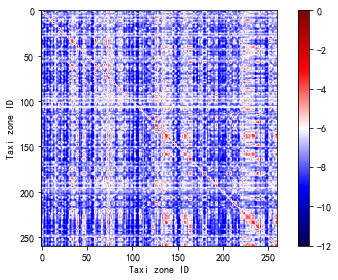

In [8]:
plt.imshow(np.log(np.array(P)),cmap='seismic',interpolation='bicubic',vmin=-12,vmax=0)

plt.colorbar()

plt.xlabel('Taxi zone ID')
plt.ylabel('Taxi zone ID')
plt.tight_layout()

plt.savefig('Heat map from March 13 to March 31,2020.svg',dpi=1000,format='svg')